In [39]:
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [40]:
df = pd.read_csv("combined_df.csv", index_col=0)
df = df[pd.to_numeric(df.confidence_x) > 0.7]
df = df[pd.to_numeric(df.confidence_y) > 0.7]
df.describe()

,potential_bolide_id,potential_bolide_longitude,potential_bolide_latitude,confidence_x,confidence_y,_id,yaw_flip_flag,maxEnergy,totEnergy,nGroups,duration,latLonLinelets,energyRatio,splinelets,groundTrackDeviation,chop,glint,neighborhood,latLonLinearity,medianAlt_g16,medianSpeed_g16,medianResDist_g16,medianAlt_g17,medianSpeed_g17,medianResDist_g17,phase,moon_fullness,solarhour,sun_alt_obs,sun_alt_app,csm_1,csm_2,csm_1_17,csm_2_17,csm_2_16,csm_1_16,medianAlt,medianSpeed,medianResDist
count,5.008000e+03,5008.000000,5008.000000,5008.000000,5008.000000,5.008000e+03,5008.000000,5.008000e+03,5.008000e+03,5008.000000,5008.000000,5.008000e+03,5008.000000,5.008000e+03,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,1909.000000,1899.000000,1909.000000,1909.000000,1899.000000,1909.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,4363.000000,4375.000000,3256.000000,3363.000000,3694.000000,3510.000000,1909.000000,1899.000000,1909.000000
mean,1.671665e+18,-92.714848,2.818525,0.920686,0.920686,1.671665e+18,0.612620,2.799022e-14,1.982752e-12,80.154553,0.193478,8.664879e-07,0.550828,1.370618e-03,0.595553,0.012034,6044.125152,0.203250,0.711461,77.084917,45.390917,3.544123,77.084024,46.179532,3.544123,0.480456,0.488211,7.366962,-2.375560,-2.454431,0.634604,0.641788,0.677734,0.681653,0.617213,0.608654,77.084470,45.785225,3.544123
std,4.998400e+16,67.262351,25.826093,0.084713,0.084713,4.998400e+16,0.922012,8.091939e-14,1.478745e-11,95.316339,0.240844,1.642071e-05,0.126255,1.812913e-03,1.653858,0.014439,2810.788390,1.541024,0.273163,18.042035,112.923635,35.989156,18.045363,101.205183,35.989156,0.292257,0.284962,5.006921,36.609872,36.598740,0.319118,0.281735,0.313467,0.283678,0.305172,0.341940,18.043686,100.948598,35.989156
min,1.620192e+18,-179.829575,-56.084396,0.700329,0.700329,1.620192e+18,0.000000,1.285030e-15,3.040003e-14,20.000000,0.037765,2.555835e-14,0.087107,7.776743e-07,0.000629,0.000000,19.866321,0.000000,0.005218,9.652346,0.065676,0.006051,9.658417,0.056455,0.006051,0.000354,0.000003,0.007717,-88.451701,-88.451701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.655382,0.061065,0.006051
25%,1.620204e+18,-131.131691,-17.505121,0.870000,0.870000,1.620204e+18,0.000000,5.784490e-15,1.519308e-13,32.000000,0.069428,6.281880e-11,0.479929,3.404956e-04,0.005727,0.000000,4022.555530,0.000000,0.495794,76.516262,0.594743,1.191164,76.516848,0.585563,1.191164,0.217820,0.228684,4.074882,-30.296487,-30.296487,0.371706,0.428851,0.423027,0.457874,0.364434,0.304576,76.515381,0.594695,1.191164
50%,1.720192e+18,-103.952076,3.125391,0.956092,0.956092,1.720192e+18,0.000000,1.068390e-14,3.347579e-13,50.000000,0.117113,1.687780e-10,0.548089,8.091738e-04,0.007958,0.007752,5794.751743,0.000000,0.731651,82.887033,1.952341,2.438583,82.887127,2.198962,2.438583,0.475982,0.485265,6.400811,-1.948505,-3.211300,0.697070,0.685471,0.768914,0.748319,0.664612,0.673796,82.887080,3.976587,2.438583
75%,1.720210e+18,-67.572543,23.902517,0.990000,0.990000,1.720210e+18,2.000000,2.308241e-14,9.410545e-13,90.000000,0.220873,4.935013e-10,0.629166,1.698630e-03,0.012939,0.020000,7675.302813,0.000000,0.998256,87.206415,74.322189,3.766567,87.204013,72.359438,3.766567,0.736354,0.728623,9.008958,25.306943,25.273419,0.945061,0.895556,0.978758,0.944323,0.903549,0.950835,87.205214,73.276714,3.766567
max,1.720222e+18,179.871216,55.481396,1.000000,1.000000,1.720222e+18,2.000000,2.159426e-12,8.648031e-10,1577.000000,3.519494,9.461542e-04,0.954660,2.841545e-02,24.563548,0.147059,20015.086796,63.965517,0.999991,108.444170,3860.275003,1572.705731,108.441648,2072.087261,1572.705731,0.999999,0.999689,23.996054,87.615317,87.614661,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,108.442909,2966.181132,1572.705731


In [41]:
# df = pd.read_csv("combined_df.csv", index_col=0)
df[["medianAlt", "medianSpeed", "medianResDist", "csm_1", "csm_2"]] = df[["medianAlt", "medianSpeed", "medianResDist", "csm_1", "csm_2"]].fillna(-1)
df["csm"] = df["csm_2"].apply(lambda v: -1 if v == -1 else 0 if v < 0.25 else 1)
df.describe()

,potential_bolide_id,potential_bolide_longitude,potential_bolide_latitude,confidence_x,confidence_y,_id,yaw_flip_flag,maxEnergy,totEnergy,nGroups,duration,latLonLinelets,energyRatio,splinelets,groundTrackDeviation,chop,glint,neighborhood,latLonLinearity,medianAlt_g16,medianSpeed_g16,medianResDist_g16,medianAlt_g17,medianSpeed_g17,medianResDist_g17,phase,moon_fullness,solarhour,sun_alt_obs,sun_alt_app,csm_1,csm_2,csm_1_17,csm_2_17,csm_2_16,csm_1_16,medianAlt,medianSpeed,medianResDist,csm
count,5.008000e+03,5008.000000,5008.000000,5008.000000,5008.000000,5.008000e+03,5008.000000,5.008000e+03,5.008000e+03,5008.000000,5008.000000,5.008000e+03,5008.000000,5.008000e+03,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,1909.000000,1899.000000,1909.000000,1909.000000,1899.000000,1909.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,3256.000000,3363.000000,3694.000000,3510.000000,5008.000000,5008.000000,5008.000000,5008.000000
mean,1.671665e+18,-92.714848,2.818525,0.920686,0.920686,1.671665e+18,0.612620,2.799022e-14,1.982752e-12,80.154553,0.193478,8.664879e-07,0.550828,1.370618e-03,0.595553,0.012034,6044.125152,0.203250,0.711461,77.084917,45.390917,3.544123,77.084024,46.179532,3.544123,0.480456,0.488211,7.366962,-2.375560,-2.454431,0.424077,0.434269,0.677734,0.681653,0.617213,0.608654,28.765027,16.740643,0.732175,0.644169
std,4.998400e+16,67.262351,25.826093,0.084713,0.084713,4.998400e+16,0.922012,8.091939e-14,1.478745e-11,95.316339,0.240844,1.642071e-05,0.126255,1.812913e-03,1.653858,0.014439,2810.788390,1.541024,0.273163,18.042035,112.923635,35.989156,18.045363,101.205183,35.989156,0.292257,0.284962,5.006921,36.609872,36.598740,0.623365,0.605835,0.313467,0.283678,0.305172,0.341940,39.529512,66.168901,22.325691,0.694339
min,1.620192e+18,-179.829575,-56.084396,0.700329,0.700329,1.620192e+18,0.000000,1.285030e-15,3.040003e-14,20.000000,0.037765,2.555835e-14,0.087107,7.776743e-07,0.000629,0.000000,19.866321,0.000000,0.005218,9.652346,0.065676,0.006051,9.658417,0.056455,0.006051,0.000354,0.000003,0.007717,-88.451701,-88.451701,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.620204e+18,-131.131691,-17.505121,0.870000,0.870000,1.620204e+18,0.000000,5.784490e-15,1.519308e-13,32.000000,0.069428,6.281880e-11,0.479929,3.404956e-04,0.005727,0.000000,4022.555530,0.000000,0.495794,76.516262,0.594743,1.191164,76.516848,0.585563,1.191164,0.217820,0.228684,4.074882,-30.296487,-30.296487,0.198357,0.281761,0.423027,0.457874,0.364434,0.304576,-1.000000,-1.000000,-1.000000,1.000000
50%,1.720192e+18,-103.952076,3.125391,0.956092,0.956092,1.720192e+18,0.000000,1.068390e-14,3.347579e-13,50.000000,0.117113,1.687780e-10,0.548089,8.091738e-04,0.007958,0.007752,5794.751743,0.000000,0.731651,82.887033,1.952341,2.438583,82.887127,2.198962,2.438583,0.475982,0.485265,6.400811,-1.948505,-3.211300,0.606174,0.615830,0.768914,0.748319,0.664612,0.673796,-1.000000,-1.000000,-1.000000,1.000000
75%,1.720210e+18,-67.572543,23.902517,0.990000,0.990000,1.720210e+18,2.000000,2.308241e-14,9.410545e-13,90.000000,0.220873,4.935013e-10,0.629166,1.698630e-03,0.012939,0.020000,7675.302813,0.000000,0.998256,87.206415,74.322189,3.766567,87.204013,72.359438,3.766567,0.736354,0.728623,9.008958,25.306943,25.273419,0.915125,0.865982,0.978758,0.944323,0.903549,0.950835,79.144941,0.789099,1.664091,1.000000
max,1.720222e+18,179.871216,55.481396,1.000000,1.000000,1.720222e+18,2.000000,2.159426e-12,8.648031e-10,1577.000000,3.519494,9.461542e-04,0.954660,2.841545e-02,24.563548,0.147059,20015.086796,63.965517,0.999991,108.444170,3860.275003,1572.705731,108.441648,2072.087261,1572.705731,0.999999,0.999689,23.996054,87.615317,87.614661,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,108.442909,2966.181132,1572.705731,1.000000


In [42]:
# remove solarhour, sun_alt_app, medianSpeed

target_columns = ['yaw_flip_flag', 'maxEnergy', 'totEnergy',
       'nGroups', 'duration', 'latLonLinelets', 'energyRatio', 'splinelets',
       'groundTrackDeviation', 'chop', 'glint', 'neighborhood',
       'latLonLinearity', 'medianAlt',
       'medianResDist', 'phase', 'moon_fullness',
       'sun_alt_obs', 'csm']

bolides_df = df.loc[df.is_bolide, target_columns]
nbolides_df = df.loc[~df.is_bolide, target_columns]

In [43]:
#Importing libraries
import os
import math

import numpy as np
import matplotlib.pyplot as plt
## import cv2
import pandas as pd
import random
import seaborn as sns
from scipy.cluster.vq import vq
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from scipy import spatial
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [44]:
X = df[target_columns]
y = df["is_bolide"].astype(int)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((3605, 19), (902, 19), (501, 19), (3605,), (902,), (501,))

In [45]:
# use standard scaler to rescale by running fit and transform on hand coded train features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# apply the same transform to val and test
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [46]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

## Correlation Analysis

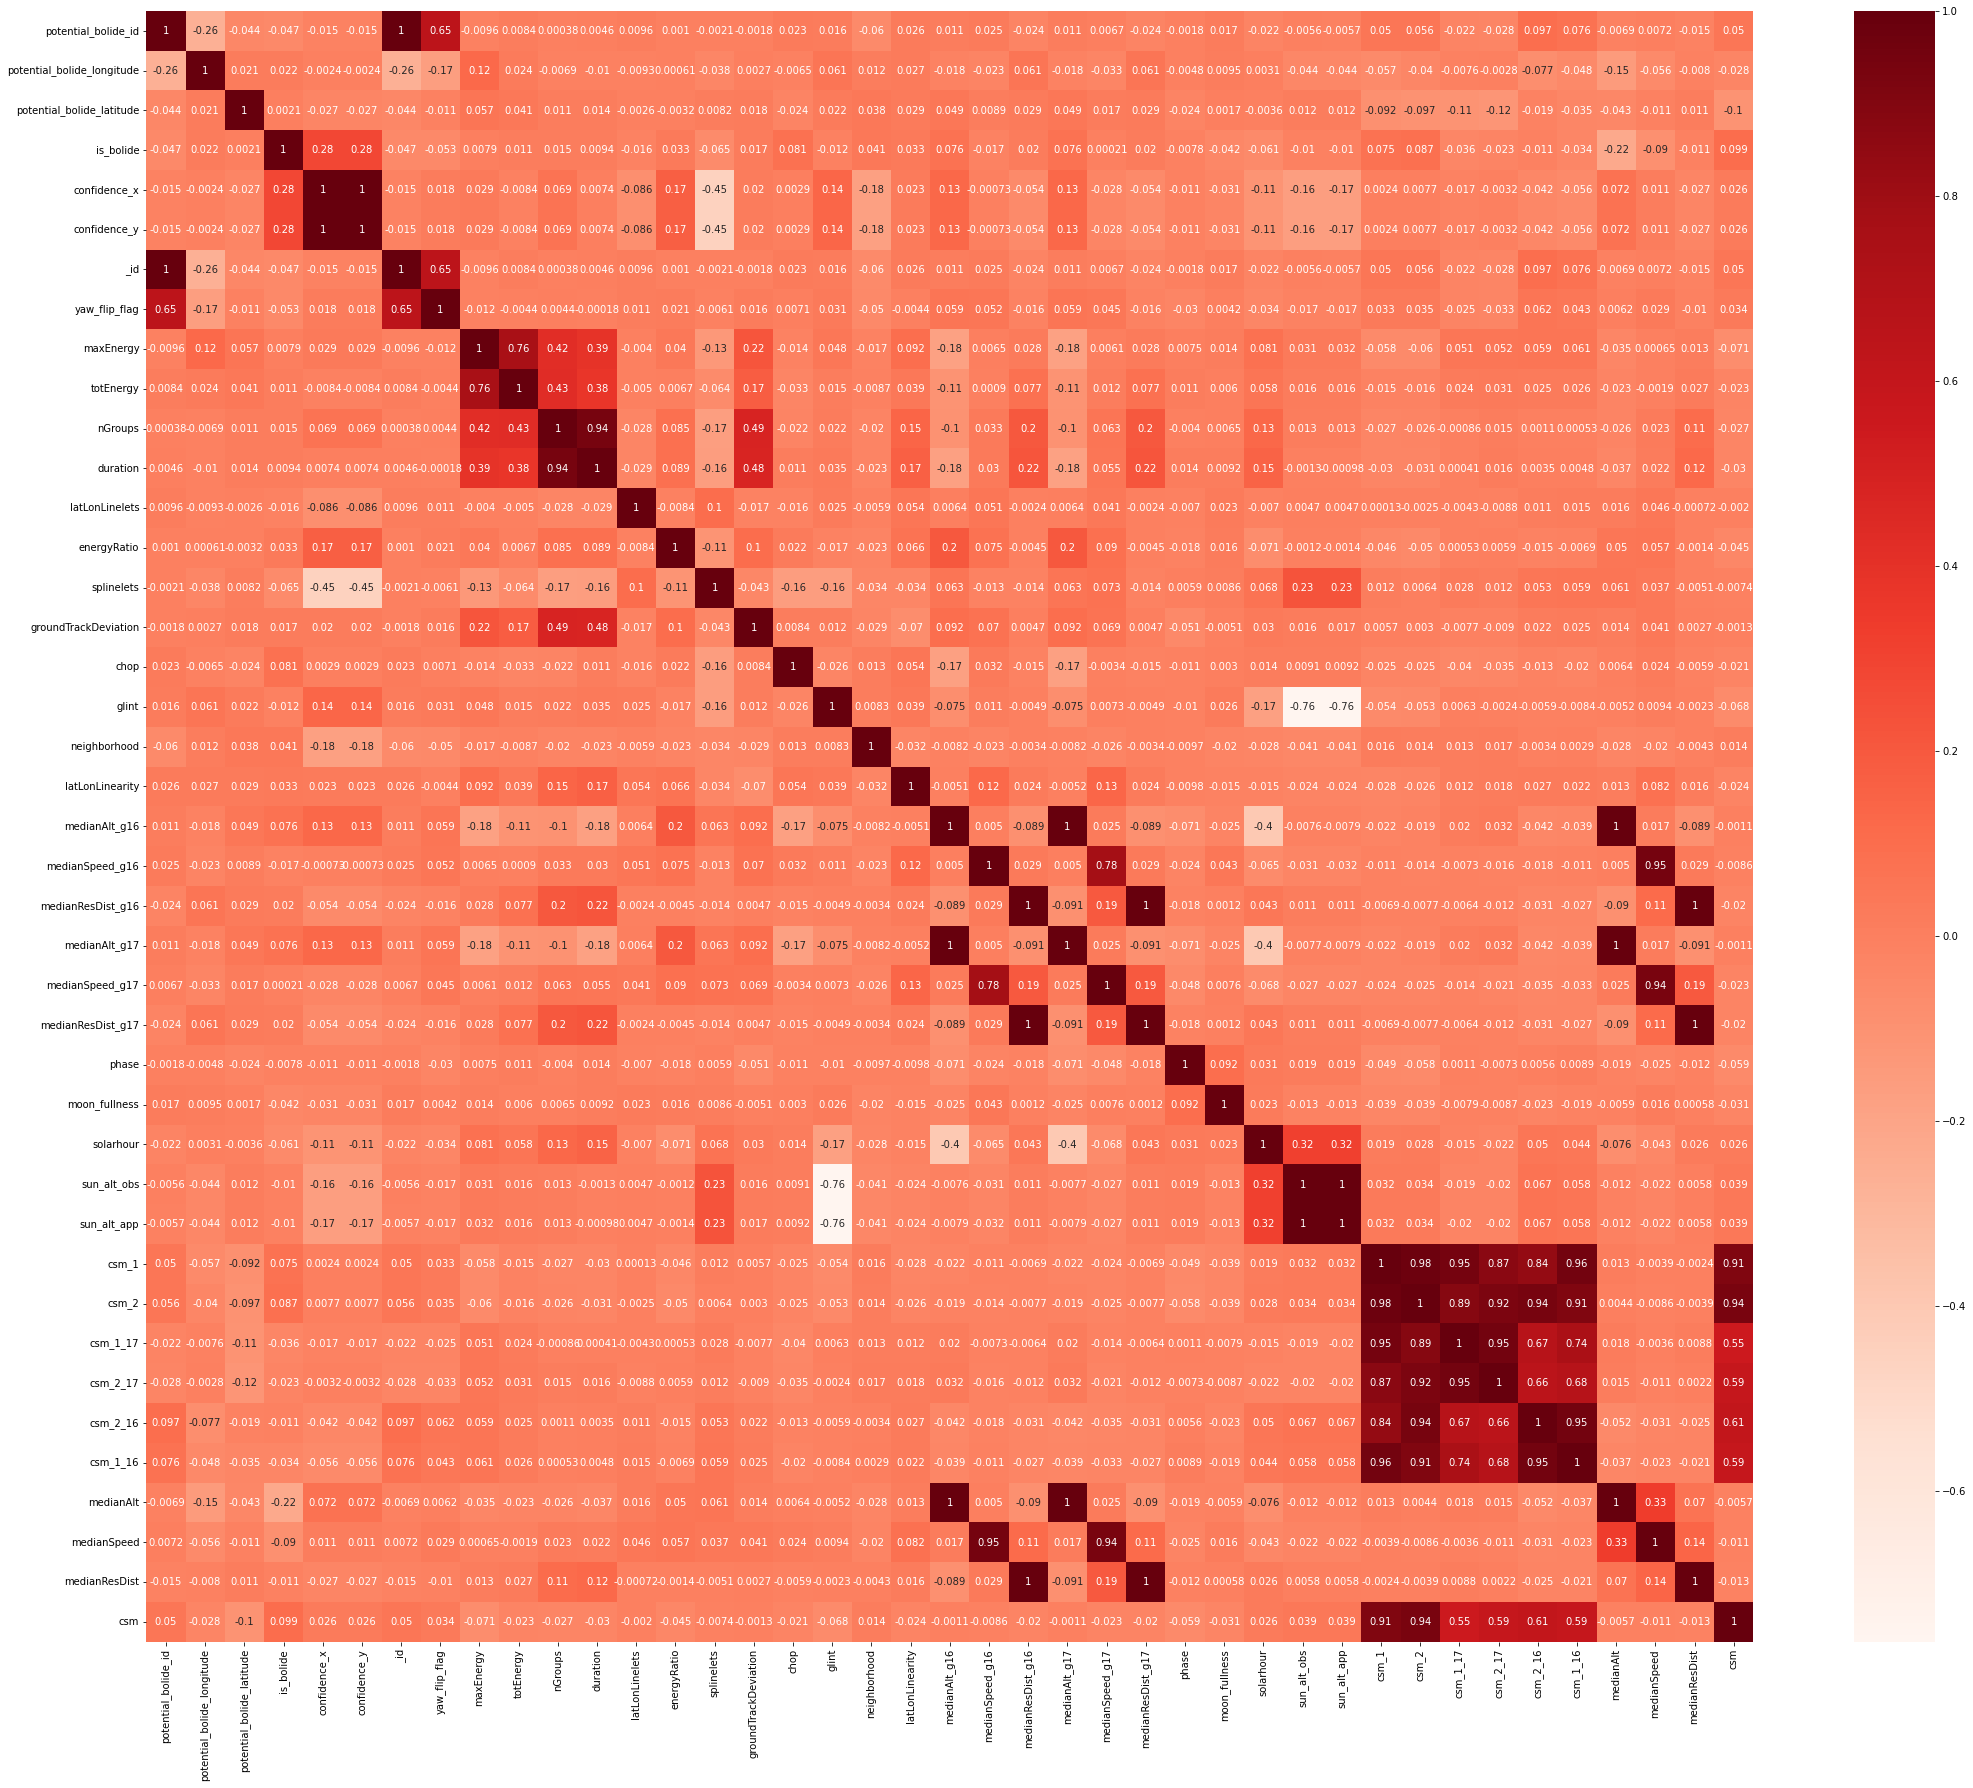

In [47]:
#Using Pearson Correlation
plt.figure(figsize=(36,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Backwards Elimination

In [48]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                   2.325621e-44
yaw_flip_flag           5.160469e-05
maxEnergy               6.190595e-01
totEnergy               6.190595e-01
nGroups                 6.985476e-02
duration                1.629624e-02
latLonLinelets          6.128501e-01
energyRatio             2.145750e-03
splinelets              5.357801e-02
groundTrackDeviation    8.716171e-02
chop                    1.191576e-08
glint                   1.096044e-01
neighborhood            3.884057e-02
latLonLinearity         7.187234e-03
medianAlt               3.517461e-60
medianResDist           5.272166e-01
phase                   9.074140e-01
moon_fullness           4.632281e-03
sun_alt_obs             7.771629e-02
csm                     1.696764e-13
dtype: float64

In [49]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['yaw_flip_flag', 'nGroups', 'duration', 'energyRatio', 'splinelets', 'chop', 'neighborhood', 'latLonLinearity', 'medianAlt', 'moon_fullness', 'csm']


## PCA

# CSM all

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


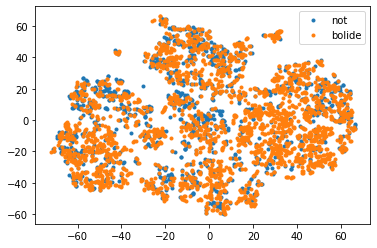

In [50]:
# use tSNE to plot hand coded train features after PCA dimensionality reduction in 2D
tsne = TSNE(n_components=2, random_state=42)
# rescale train PCA data so tSNE can treat dimensions with equal importance
tsne_X = tsne.fit_transform(scaler.fit_transform(X_train))
# plot tSNE of rescaled train PCA data
tsne_plot_x = tsne_X[:, 0]
tsne_plot_y = tsne_X[:, 1]
check_x_0 = tsne_plot_x[y_train == 0]
check_y_0 = tsne_plot_y[y_train == 0]
check_x_1 = tsne_plot_x[y_train == 1]
check_y_1 = tsne_plot_y[y_train == 1]
plt.plot(check_x_0, check_y_0, ".", label = 'not')
plt.plot(check_x_1, check_y_1, ".", label = 'bolide')
_ = plt.legend()

In [51]:
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’} 
# init and fit rbf svc model to train PCA data
rbf_clf = svm.SVC(kernel='rbf', random_state=42)
rbf_clf.fit(X_train, y_train)
# print validation scores and classification metrics
rbf_validation_score = rbf_clf.score(X_val, y_val)
rbf_validation_score

0.6419068736141907

In [52]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, random_state=42) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7145708582834331


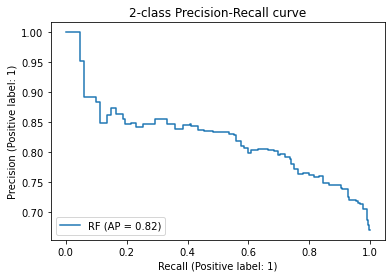

In [53]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="RF"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

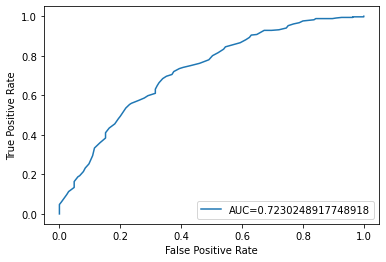

In [54]:
#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [55]:
# conda install tensorflow
# conda install xgboost

In [56]:
import pandas as pd
import numpy as np 
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Gradient Boost, Default Perams

In [57]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb = GradientBoostingClassifier(learning_rate=learning_rate)
    gb.fit(X_train, y_train)
    predictions = gb.predict(X_val)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.762
Accuracy score (validation): 0.685
Learning rate:  0.075
Accuracy score (training): 0.775
Accuracy score (validation): 0.672
Learning rate:  0.1
Accuracy score (training): 0.784
Accuracy score (validation): 0.673
Learning rate:  0.25
Accuracy score (training): 0.851
Accuracy score (validation): 0.673
Learning rate:  0.5
Accuracy score (training): 0.909
Accuracy score (validation): 0.665
Learning rate:  0.75
Accuracy score (training): 0.936
Accuracy score (validation): 0.665
Learning rate:  1
Accuracy score (training): 0.957
Accuracy score (validation): 0.635


Classification Report
              precision    recall  f1-score   support

           0       0.51      0.42      0.46       334
           1       0.69      0.76      0.73       568

    accuracy                           0.64       902
   macro avg       0.60      0.59      0.59       902
weighted avg       0.62      0.64      0.63       902

Confusion Matrix:


<AxesSubplot:>

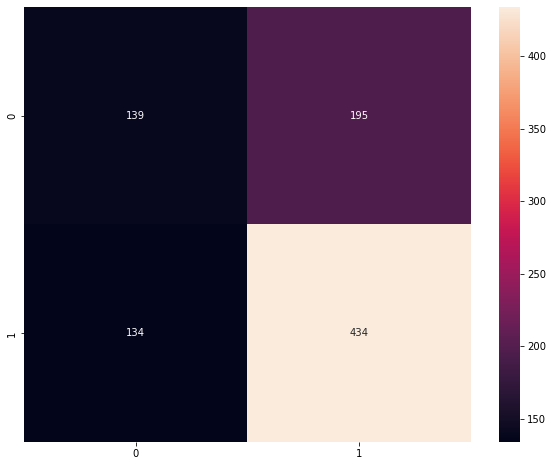

In [58]:
print("Classification Report")
print(classification_report(y_val, predictions))

print("Confusion Matrix:")
con = confusion_matrix(y_val, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(con, annot=True, fmt='d')

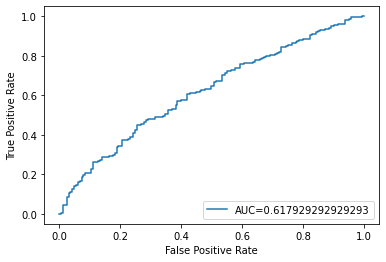

In [59]:
#define metrics
y_pred_proba = gb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Gradient Boost, estimators = 100, max features = 2, max_depth = 2

In [60]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=None)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.714
Accuracy score (validation): 0.664
Learning rate:  0.075
Accuracy score (training): 0.728
Accuracy score (validation): 0.665
Learning rate:  0.1
Accuracy score (training): 0.734
Accuracy score (validation): 0.666
Learning rate:  0.25
Accuracy score (training): 0.757
Accuracy score (validation): 0.673
Learning rate:  0.5
Accuracy score (training): 0.788
Accuracy score (validation): 0.657
Learning rate:  0.75
Accuracy score (training): 0.799
Accuracy score (validation): 0.660
Learning rate:  1
Accuracy score (training): 0.812
Accuracy score (validation): 0.655


Classification Report
              precision    recall  f1-score   support

           0       0.61      0.27      0.37       334
           1       0.68      0.90      0.77       568

    accuracy                           0.67       902
   macro avg       0.65      0.58      0.57       902
weighted avg       0.65      0.67      0.62       902

Confusion Matrix:


<AxesSubplot:>

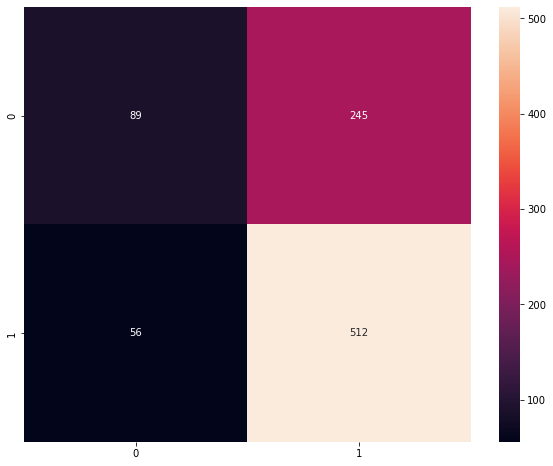

In [61]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=2, max_depth=2, random_state=None)
gb_clf.fit(X_train, y_train)
predictions = gb_clf.predict(X_val)

print("Classification Report")
print(classification_report(y_val, predictions))

print("Confusion Matrix:")
con = confusion_matrix(y_val, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(con, annot=True, fmt='d')

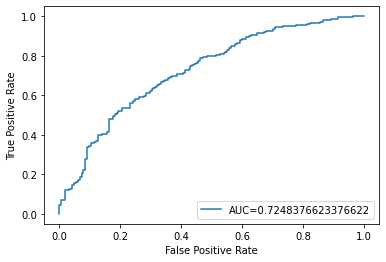

In [62]:
#define metrics
y_pred_proba = gb_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Gradient Boost, estimators = 100, max features = None, max_depth = 3

In [63]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=None, max_depth=3, random_state=None)
    gb_clf2.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf2.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf2.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.762
Accuracy score (validation): 0.685
Learning rate:  0.075
Accuracy score (training): 0.775
Accuracy score (validation): 0.673
Learning rate:  0.1
Accuracy score (training): 0.784
Accuracy score (validation): 0.673
Learning rate:  0.25
Accuracy score (training): 0.851
Accuracy score (validation): 0.673
Learning rate:  0.5
Accuracy score (training): 0.909
Accuracy score (validation): 0.666
Learning rate:  0.75
Accuracy score (training): 0.936
Accuracy score (validation): 0.667
Learning rate:  1
Accuracy score (training): 0.957
Accuracy score (validation): 0.637


Classification Report
              precision    recall  f1-score   support

           0       0.61      0.33      0.43       334
           1       0.69      0.88      0.77       568

    accuracy                           0.67       902
   macro avg       0.65      0.60      0.60       902
weighted avg       0.66      0.67      0.64       902

Confusion Matrix:


<AxesSubplot:>

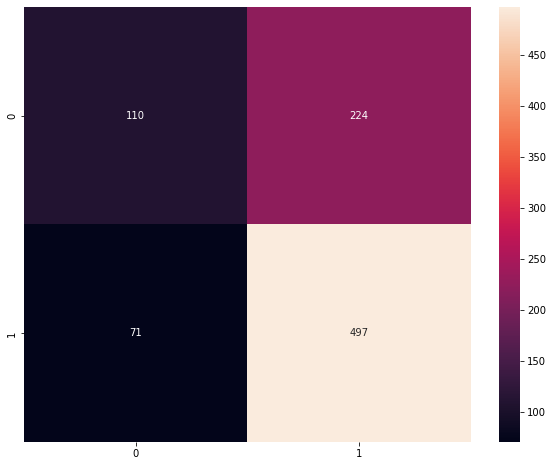

In [64]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=None, max_depth=3, random_state=None)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Classification Report")
print(classification_report(y_val, predictions))

print("Confusion Matrix:")
con = confusion_matrix(y_val, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(con, annot=True, fmt='d')

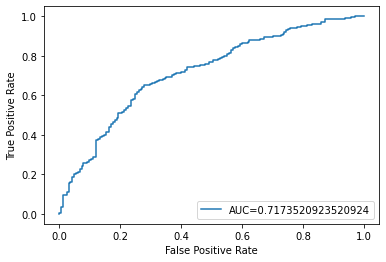

In [65]:
#define metrics
y_pred_proba = gb_clf2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## XGBoost

In [66]:
xgb_clf = XGBClassifier(learning_rate=.075)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.075, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [67]:
score = xgb_clf.score(X_val, y_val)
print(score)

0.6707317073170732


In [68]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    xgb = XGBClassifier(learning_rate=learning_rate)
    xgb.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(xgb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(xgb.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.877
Accuracy score (validation): 0.681
Learning rate:  0.075
Accuracy score (training): 0.892
Accuracy score (validation): 0.671
Learning rate:  0.1
Accuracy score (training): 0.917
Accuracy score (validation): 0.675
Learning rate:  0.25
Accuracy score (training): 0.989
Accuracy score (validation): 0.653
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.664
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.639
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.654


Classification Report
              precision    recall  f1-score   support

           0       0.61      0.35      0.45       334
           1       0.69      0.86      0.77       568

    accuracy                           0.68       902
   macro avg       0.65      0.61      0.61       902
weighted avg       0.66      0.68      0.65       902

Confusion Matrix:


<AxesSubplot:>

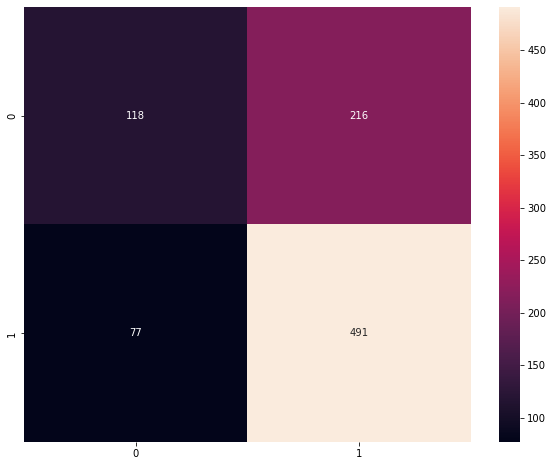

In [69]:
xgb = XGBClassifier(learning_rate=0.1)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_val)

print("Classification Report")
print(classification_report(y_val, predictions))

print("Confusion Matrix:")
con = confusion_matrix(y_val, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(con, annot=True, fmt='d')

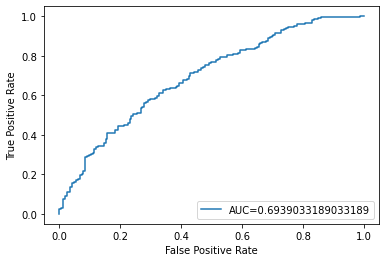

In [70]:
#define metrics
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()